
# Kierros 2 kubitit ja operaattorit

Palautus KE 15.3.2023 klo 16.15. 

$$\renewcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\renewcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\renewcommand{\braket}[2]{\left\langle{#1}|{#2}\right\rangle}$$

Kierroksella tutkitaan miten erilaisten kvanttiporttien operaatiot vaikuttavat kubitin kvanttitilaa esittävään tilavektoriin Blochin pallolla. Sen takia on tärkeää tutkia tehtävien ratkaisuja myös [Blochin palloa kuvaavan simulaation avulla.](https://bloch.ollpu.fi)

## Sisältö

- Kubitin tila ket-vektorina
- Operaattorit, X- eli NOT-operaattori



Lisätehtävänä hiihtolomalla on myös lukea kierroksen 1 tehtävänä olleen artikkelin <a href="https://drive.google.com/file/d/1O9ZhyggdZhNQS9JIg7TlcIls_mdM4zAi/view?usp=sharing" target="_blank">
 Skrolli-lehden artikkeli "Kvantit horisontissa" </a>. Näin ymmärryksesi kvanttitietokoneiden toiminnasta ja sovelluksista kasvaa.

In [11]:
import matplotlib.pyplot as plt
# jos käytät vscodea ja tarvitset pimeän väriteeman niin poista # kommenttimerkki
plt.style.use('dark_background')

## Kubitin tila ket-vektorina

Kvanttitietokoneen muistissa tieto esitetään kubittien avulla. Kvanttimekaniikassa on tapana käyttä _Diracin notaatiota_ esittämään kvanttitiloja.

Määrittelemme kubitin laskennalliset kantatilat 0 ja 1 seuraavasti:

$$
\begin{align}
\ket 0 &= \begin{pmatrix} 1 \\ 0 \end{pmatrix} \\
\ket 1 &= \begin{pmatrix} 0 \\ 1 \end{pmatrix}.
\end{align}
$$

> Huomaa, että luvut $0$ ja $1$ ovat kompleksilukuja. Tulemme käsittelemään kompleksilukuja ja kompleksimatriiseja myöhemmin kurssilla.

$\ket 0$ lausutaan "ket nolla", ja se vastaa kubitin nollatilaa.

Diracin notaatiossa on myös toisenlainen vektori, "bra"-vektori, joka piirretään seuraavasti:
$$\bra 0$$

Ket ja bra vektorien erot selitetään myöhemmin. Tärkeää on tässä vaiheessa vain tietää, että kubitin tilat ovat vektoreita.

### Lisämateriaalia

Jos haluat tutustua syvemmin aiheeseen, lue tämä [Qiskitin artikkeli.](https://qiskit.org/textbook/ch-states/representing-qubit-states.html)

## Blochin pallo

Blochin pallo on yleinen tapa visualisoida yhden kubitin tila kolmiulotteisen pallon pinnalla.

> Huomaa, että vektorit Blochin pallolla, eli Blochin vektorit, eivät täydellisesti vastaa tilavektoreita. Tilavektoreita on silti käytännöllistä ajatella pisteinä pallon kuorella, koska operaattorit, joista opimme seuraavaksi, ovat intuitiivisesti esitettävissä pallon ympäri pyörityksinä.

Blochin pallolla pohjoisnapa vastaa tilaa $\ket 0$ ja etelänapa tilaa $\ket 1$. Vektorien $\ket 0$ ja $\ket 1$ välinen kulma on $90°$, joka vastaa Blochin pallolla $180°$ kulmaa. Alla on tilojen $\ket 0$ ja $\ket 1$ esitys Blochin pallolla.

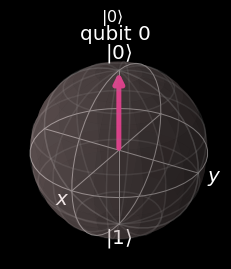

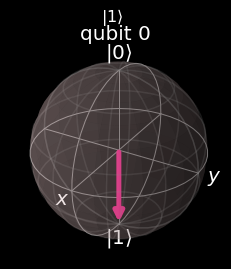

In [42]:
import numpy as np
from qiskit import *
from qiskit.quantum_info import *
from qiskit.visualization import plot_bloch_multivector

zero = np.array([[1], [0]])
one = np.array([[0], [1]])

display(plot_bloch_multivector(Statevector(zero), title="$|0\\rangle$"))
display(plot_bloch_multivector(Statevector(one), title="$|1\\rangle$"))

## Operaattorit

Operaattorit ovat kuin funktiota kvanttimekaniikassa, joilla pystytään kuvaamaan tila toiseksi tilaksi.

Operaattoreita kutsutaan kvanttilaskennassa _porteiksi_, mutta jokaiselle operaattorille ei välttämättä löydy porttia kyseisestä kvanttitietokoneesta (tai simulaatiomallista). Myöhemmin opimme, että koko kvanttipiirin toimintaa voi kuvata yhdellä operaattorilla.

Operaattorit ovat _lineaarikuvauksia_. Koska kompleksivektorien lineaarikuvauksia on hieman vaikea havainnollistaa visuaalisesti, on hyödyllisempää ajatella niitä pyörityksinä Blochin pallolla.

> Blochin pallo toimii analogiana vain yhden kubitin tiloille ja operaattoreille. Kun siirrymme usean kubitin järjestelmiin, joudumme perustamaan intuitiomme matriisilaskentaan.

### NOT-operaattori $X$

Kun $X$-portti operoi kubittiin, niin kubitin tila muuttuu sen loogiseksi negaatioksi, eli

$$
X\ket 0 = \ket 1 \\
X\ket 1 = \ket 0
$$

$X$-operaattorin käänteisoperaattori $X^{-1}$ on $X$, koska kaksi $180°$ kiertoa minkä tahansa akselin ympäri vastaa $0°$ kiertoa, eli identiteettioperaattoria $I$. Identiteettioperaattori kuvaa tilavektorista $\ket \psi$ saman:

$$ I\ket \psi = \ket \psi $$

> Kreikkalaista kirjainta psii ($\psi$) käytetään laajasti kvanttilaskennassa tilavektorin nimenä.

$$ 
\begin{array}{rllllll}
& XX & = I \\
\Rightarrow & XX\ket \psi & = \ket \psi
\end{array}
$$

Voit kokeilla eri standardioperaattoreita [tässä demossa](https://bloch.ollpu.fi) tai [tässä demossa.](https://javafxpert.github.io/grok-bloch/)

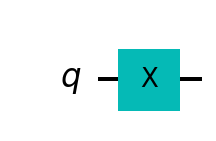

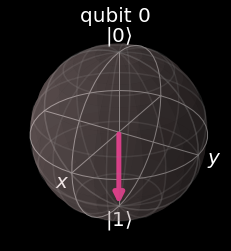

In [26]:
# Luodaan uusi kvanttipiiri, joka koostuu yhdestä kubitista
circuit = QuantumCircuit(1)

# Operoidaan kubittia 0, eli piirin ainoaa kubittia X-portilla
circuit.x(0)

# Piirretään aikaansaatu kvanttipiiri
# Parametri output="mpl" kertoo, että piirto tapahtuu graafisesti
display(circuit.draw(output="mpl", scale=2))

# Piirretään piirin lopullinen kvanttitila Blochin pallolla
result = execute(circuit, Aer.get_backend("statevector_simulator")).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

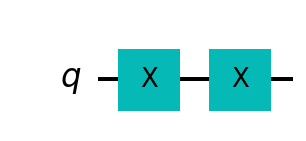

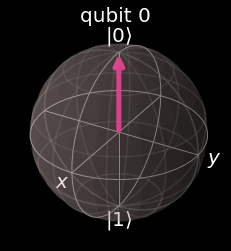

In [27]:
circuit = QuantumCircuit(1)

# Kaksi X operaattoria kumoavat toisensa
circuit.x(0)
circuit.x(0)

display(circuit.draw(output="mpl", scale=2))
result = execute(circuit, Aer.get_backend("statevector_simulator")).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

## Superpositio

Superpositiolla tarkoitetaan lineaarikombinaatiota kantatiloista. Kantatilat voivat esimerkiksi olla $\ket 0$ ja $\ket 1$, eli laskennalliset kantatilat.

### Kubitin yleinen tila

Kubitti $\ket q$ (joka ei ole _lomittunut_ ympäristönsä kanssa) voidaan esittää lineaarikombinaationa seuraavasti:

$$
\ket q = \alpha \ket 0 + \beta \ket 1 \\
\alpha, \beta \in \mathbb C
$$

Kantatilojen kertoimia $\alpha$ ja $\beta$ sanotaan tilan _amplitudeiksi_. Amplitudeilla on erittäin tärkeä rajoite: _normalisaatio_. Normalisaatio tarkoittaa, että tilavektorin pituus on oltava $1$. Tämä rajoite voidaan kirjoittaa seuraavasti:

$$ |\alpha|^2 + |\beta|^2 = 1 $$

> Tämä kaava saadaan laskemalla sisätulo $\braket \psi \psi$, jonka käsittelemme konjugaattitranspoosin yhteydessä. Kompleksiluvun itseisarvo $|\cdot|$ käsitellään myöhemmin.

### Lomittuminen on luonnollinen resurssi

Lomittuminen on kvanttifysiikan ilmiö, joka on samalla kvanttilaskennan tärkein resurssi. Lomittuminen mahdollistaa suuren korrelaation kaukana toisistaan olevien kvanttijärjestelmien _mittausten_ välillä, joka on klassisen mekaniikan mukaan mahdotonta.

Kaikki tärkeät kvanttilaskennan algoritmit käyttävät lomittumista hyödyksi.

### Tilat $\ket +$ ja $\ket -$

Yleisimmät laskennallisen kannan superpositiotilat ovat $\ket +$ ja $\ket -$. Ne muodostuvat yhtä suurista osista $\ket 0$ ja $\ket 1$ tiloja, ja voidaankin ajatella niiden olevan näiden kantatilojen välissä.

$$
\begin{array}{rll}
\ket + & = & \frac{1}{\sqrt 2}\left(\ket 0 {\color{red}+} \ket 1\right) \\
\ket - & = & \frac{1}{\sqrt 2}\left(\ket 0 {\color{red}-} \ket 1\right)
\end{array}
$$

Tilat kelpaavat kvanttitiloiksi, koska ne ovat normalisoituja.

Osoitetaan, että $\ket -$ on normalisoitu:

$$
\begin{array}{rll}
\alpha &= \frac{1}{\sqrt 2} \\
\beta &= -\frac{1}{\sqrt 2} \\
\end{array}
$$

$$
\begin{array}{rccc}
& \left|\frac{1}{\sqrt 2}\right|^2 &+& \left|-\frac{1}{\sqrt 2}\right|^2 \\
=& \frac{1}{2} &+& \frac{1}{2}
\end{array}
$$

Seuraavassa koodinpätkässä näemme $\ket +$ ja $\ket -$ tilat Blochin pallolla.

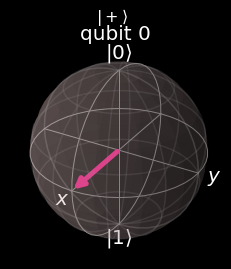

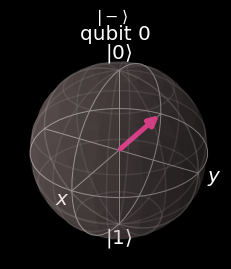

In [37]:
plus = 1 / np.sqrt(2) * (zero + one)
minus = 1 / np.sqrt(2) * (zero - one)

display(plot_bloch_multivector(Statevector(plus), title="$|+\\rangle$"))
display(plot_bloch_multivector(Statevector(minus), title="$|-\\rangle$"))

## Hadamard-operaattori $H$

Hadamardin operaattori pyörittää Blochin vektoria ensiksi $90°$ $Y$-akselin ympäri, jonka jälkeen se ottaa peilaa vektorin Blochin pallon $XY$-tason suhteen. Tätä pyöritystä voi myös ajatella $X$- ja $Z$-akselien välisen akselin ympäri $180°$ pyörityksenä.

Pyöritys voi olla hankala kuvitella, joten tutustu siihen [Blochin pallo -tilasimulaatiossa](https://bloch.ollpu.fi), painamalla `H` näppäintä.

### Tehtävä X

Tee seuraavaan koodilohkoon yhden kubitin kvanttipiiri, jossa operoit kubittiin ensiksi $X$-portilla, ja sitten $H$-portilla. Kubitin lopputila pitäisi olla $\ket -$.

Hadamardin operaattorille löytyy qiskitistä portti koodilla `h`.

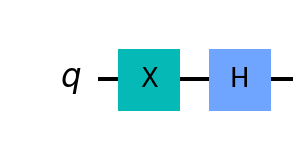

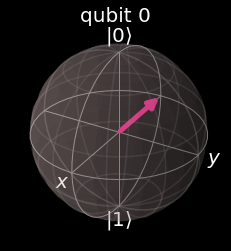

In [43]:
# TODO remove solution
# Luodaan yhden kubitin kvanttipiiri
# circuit = ____
circuit = QuantumCircuit(1)

# Lisätään portti X
# ____
circuit.x(0)
# Lisätään portti H
# ____
circuit.h(0)

display(circuit.draw(output="mpl", scale=2))
result = execute(circuit, Aer.get_backend("statevector_simulator")).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

## Yhden kubitin mittaus

Kvanttitietokoneessa kubitin mittaaminen ei ole mitenkään triviaali asia, koska mittaus yleensä muuttaa mitattavan systeemin, kuten kubitin, tilaa. Mittaustilanteessa kubitin sanotaan "romahtavan" _mittauskannan_ tiloihin. Esimerkiksi kubitin, joka on tilanssa $\ket 1$, mittaus aiheuttaa sen romahtavan tilaan $\ket 1$. Mitä tapahtuu kun mitataan kubitti, joka on $\ket +$ tilassa?

### Mittauskannat

Mittaus on sidottu johonkin _mittauskantaan_, joka yleensä vastaa jotain akselia Blochin pallolla. Qiskitissä mittaus tapahtuu aina $Z$-akselilla, jota kutsutaan laskennalliseksi kannaksi. TODO _Mittauskannan vaihto_ täytyy tehdä pyörittämällä kubitin tila laskennalliselle kannalle sopivaksi.

Hadamard-operaattorin jälkeinen tila $\ket +$ on superpositio $Z$-mittauskannassa. Mikään tila itsessään ei ole sen enemmän tai vähemmän superpositiossa, jos mittauskantaa ei ole määritelty. Esimerkiksi tila $1\cdot\ket + + 0\cdot\ket -$ ei ole superpositiossa, kun mittauskannaksi on valittu Blochin pallon $X$-akseli.

Mittauksen yhteydessä kubitista menetetään kaikki sen sisältämä "kvantti-informaatio", koska kubitti ei voi enää olla superpositiossa kyseisessä mittauskannassa. Sen sijaan kubitin tila on voi olla enää yksi kahdesta tilasta.

Jos mittauksen tulos unohdetaan, niin kubitin sanotaan olevan täysin _sekoittuneessa tilassa_. Toisin kuin puhdas tila, sekoittunut tila on esitettävissä klassisena kokoelmana useasta (puhtasta) kvanttitilasta, jossa jokaisella tilalla on tietty todennäköisyys.

> Sekoittuneet tilat esitetään Blochin pallolla vektoreina, joiden pituus on pienempi kuin 1. Täysin sekoittunut tila on Blochin pallolla nollavektori.

### Toistettu mittaus

Tarkastellaan seuraavaa kvanttipiiriä.

![mittaus](./mittaus1.png)

Piirissä kuvataan kubitin alkutila $\ket 0$ Hadamard operaattorilla tilaksi $\ket +$. $\ket +$ tila mitataan, ja tulos tallennetaan. Kutsutaan mittaustulosta, joka on yksi bitti (0 tai 1), nimellä $c_0$. Koska kubitin tila romahtaa mitatessa, on sen tila mittauksen jälkeen $\ket{c_0}$.

Seuraava mittaus saa TODO

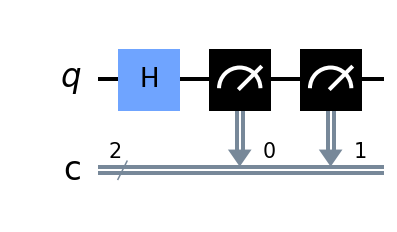

In [24]:
circuit = QuantumCircuit(1,2)

circuit.h(0)
circuit.measure(0, 0)
circuit.measure(0, 1)

# Piirretään luotu piiri.
# Parametri output="mpl" kertoo, että piirto tapahtuu graafisesti.
circuit.draw(output="mpl", scale=2)

## Kvantti-informaatioteoria ja entropia (valinnainen)

<details><summary>Klikkaa avataksesi</summary>

Entropia on mitta epäjärjestyksestä ja satunnaisuudesta järjestelmässä. Termodynamiikan toisen lain mukaan suljetun järjestelmän entropia ei koskaan voi laskea.

Entropia on hyvin tärkeä alue informaatioteoriassa, jossa entropiaa käytetään mittaamaan satunnaisen prosessin epävarmuutta. Esimerkikki satunnaisesta prosessista voi olla kubitin (superpositio)tilan romahtaminen mittauksen yhteydessä. Koska $\ket +$ koostuu yhtä suurin osin laskennallisen mittauskannan molemmista kantavektoreista $\ket 0, \ket 1$, on sen entropia sama kuin reilun kolikon heitto: 1 bitti. Kun riippumattomia tapahtumia samassa satunnaisessa prosessissa on mitattu monta kertaa, olemme saaneet jokaisesta tapahtumasta keskimäärin satunnaisprosessin entropian verran informaatiota.

Kun suoritamme kvanttipiirissä mittauksen, saamme siitä informaatiota, joten sen epävarmuus ja entropia laskee. On kuitenkin otettava huomioon, että kvanttipiiri ei tällöin ole suljettu järjestelmä, koska sieltä on nyt karannut 1 bitti informaatiota mittaajan ympäristöön.

![mittaus](./mittaus2.png)

Jos bitti putoaisi matkalla eikä mittaajalla olisi enää tietoa kubitin tilasta mittauksen jälkeen, olisi sen tila sekoittunut, eli klassinen kokoelma puhtaita tiloja.

Puhtaan tilan, kuten $\ket 0$ tai $\ket +$ entropia on aina 0 bittiä, koska se tiedetään varmuudella. Sekoittuneen tilan $\left\{50\% \ket 0, 50\% \ket 1\right\}$ entropia on toisaalta 1 bitti, eli hukkaan menneessä mittauksessa entropia voi kasvaa 1 bitillä.

Intuitiivisesti on selvää, että mittauksen hukkaaminen (johtuu mittaajan virheestä) ei itsessään vaikuta kubitin tilaan. Ainoastaan mittaajan näkökulma muuttuu: kubitti on sekoittuneessa tilassa, joten sillä on enemmän entropiaa. Toisesta mittauksesta saadut tulokset ovat samat riippumatta menikö ensimmäinen mittaus hukkaan vai ei. Tilanteessa, jossa ensimmäinen mittaus onnistui, ei toinen mittaus tuo yhtään lisää informaatiota. Peräkkäiset mittaukset eivät ole toisistaan riippumattomia tapahtumia.

[No-hiding teoreeman](https://en.wikipedia.org/wiki/No-hiding_theorem) mukaan mittauksessa "menetettyä" informaatiota ei koskaan menetetä, vaan se päätyy _ympäristöön_, eli johonkin osaan yläsysteemiä. Koko suljetun systeemin (mittaaja sekä kvanttipiiri) tila on aina puhdas, ja alisysteemin mittaus voidaan esittää koko systeemiin vaikuttavana lineaarisena operaattorina.

[Landauerin periaatteen](https://en.wikipedia.org/wiki/Landauer%27s_principle) mukaan systeemin entropia kasvaa kun informaatiota menee hukkaan. Kuten huomasimme ajatuskokeellamme, tämä pätee myös kubittien mittauksissa hukattuun informaatioon.

Lisää lukemista:
- https://en.wikipedia.org/wiki/Maxwell%27s_demon
- https://en.wikipedia.org/wiki/Quantum_information
- https://en.wikipedia.org/wiki/Holevo%27s_theorem

</details>

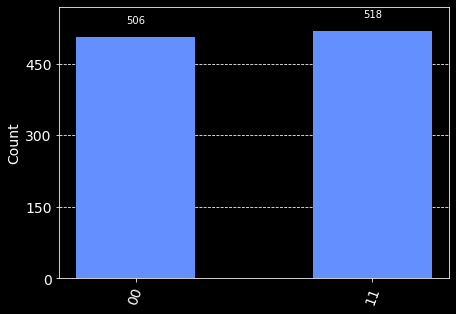

In [25]:
result = execute(circuit, Aer.get_backend('qasm_simulator')).result()
# out_state = result.get_statevector()
# plot_bloch_multivector(out_state)

from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

## Kubitin tilavektori

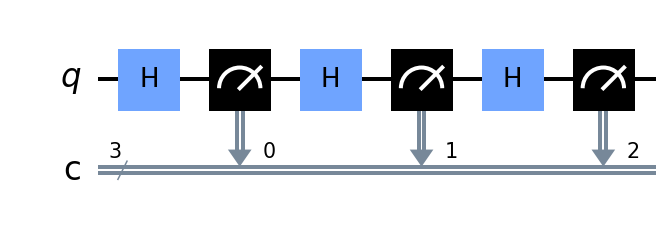

In [20]:
circuit = QuantumCircuit(1,3)

circuit.h(0)
circuit.measure(0, 0)
circuit.h(0)
circuit.measure(0, 1)
circuit.h(0)
circuit.measure(0, 2)

# Piirretään luotu piiri.
# Parametri output="mpl" kertoo, että piirto tapahtuu graafisesti.
circuit.draw(output="mpl", scale=2)

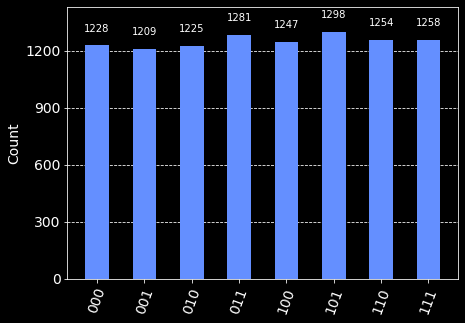

In [24]:
result = execute(circuit, Aer.get_backend('qasm_simulator'), shots=10000).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

# Vanhaa

c) Kirjoita alle yllä olevan esimerkin mukaisesti Python-koodi, joka luo kvanttipiirin, jossa on yksi kubitti alkutilassa $\ket 1$. Piirrä alkutilan tilavektori Blochin pallolle. Sen jälkeen suorita alkutilaan $\ket 1$ yksi $X$-operaatio ja piirrä lopputila Blochin pallolle.  Ohje: Alkutilan $\ket 1$ voit määrittää pythonin metodilla `.initialize(initial_state,0)`, missä `initial_state = [0,1]`. Malli on kierroksen 1 ratkaisuista.

In [ ]:
# Kirjoita c-kohdan koodisi tähän



## Tehtävä 2: yhden kubitin Y ja Z- portit ja kierrot 180 astetta y-akselin ja z-akselin ympäri

Y-portti vastaa kubitin tilavektorin kiertoa Blochin pallolla $180^o$ y-akselin ympäri . Y-portin matriisiesitys on seuraava:

$$
Y=\pmatrix {0 & -i \\ i & 0}
$$

Merkintä $i$ on kompleksilukuihin liittyvä imaginaariyksikkö, jolle on voimassa $i^2 = -1$. 
<a href="http://math.tkk.fi/opetus/p3/04/L/L1printit.pdf" target="_blank">Lisätietoa kompleksiluvuista.</a>

Vastaavasti Z-portti vastaa kubitin tilavektorin kiertoa Blochin  $180^o$ kiertoa z-akselin ympäri. Z-portin matriisiesitys on seuraava:

$$
Z=\pmatrix {1 & 0 \\ 0 & -1}
$$

a) Tutki <a href="https://bloch.ollpu.fi/" target="_blank">havainnollistavan simulaation</a> avulla miten alkutilassa $\ket 0$ oleva tilavektori  kierttyy X, Y, Z porttien vaikutuksesta Blochin pallolla x,y,z-akselien ympäri.

b) Voit ratkaista ohjelmoimalla, tai a-kohdan simulaation avulla: Jos kubitin alkutila on $\ket 0$, niin mikä on kubitin lopputila seuraavien porttien operaatioiden eli kiertojen jälkeen? Kiinnitä huomiota minkä akselin ympäri portti kiertää kubittia, ja vaikuttaako kyseinen kierto kubitin tilaan?
![kubit_xyz.png](images/kubit_xyz.png)

c) Tutustu simulaation avulla myös Hadamard-porttiin eli H-porttiin, joka on 180 asteen kierto xz-tason lävistäjän ympäri!


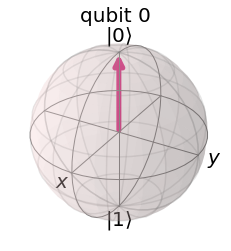

In [19]:
# Tässä voit koodin avulla tutkia tilavektoria Blochin pallolla. 
#Alustetaan kvanttipiiri qc :n yksi kubitti alkutilaan |0>
# Muista aina alustaa piiri uudestaan, jos kokeilet alla eri portteja
qc = QuantumCircuit(1)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

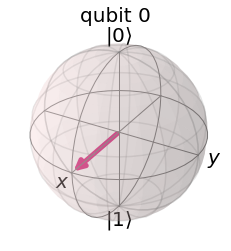

In [20]:
#Tässä voit testailla miten eri portit vaikuttavat tilavektoriin. Muista aina alustaa alkutila \0> 
#suorittamalla yläpuolinen lohko
#qc.x(0)
#qc.h(0)
#qc.z(0)
#qc.y(0)

backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

## Tehtävä 3

Hadamard eli $H$-portti muuttaa kubitin tilat $\ket 0$ ja $\ket 1$ superpositioon seuraavasti:

$$
H\ket 0 = \frac{1}{\sqrt 2} (\ket 0 +  \ket 1) = \ket +   \\
H\ket 1 = \frac{1}{\sqrt 2} (\ket 0 -  \ket 1) = \ket -
$$

Huomaa, että näitä kyseisiä tiloja merkitään välillä myös $\ket +$ ja $\ket -$.

$H$-portin matriisiesitys on seuraava:

$$
H = \frac{1}{\sqrt 2} \pmatrix {1 & 1 \\ 1 & -1}
$$


a) Laske matriisiesitystä (numpy pythonilla) käyttäen tai Geogebralla, että

$$
\begin{align}
H\ket 0 &= \ket + \text{ja} \\
H\ket 1 &= \ket -.
\end{align}
$$


Eli muodosta uudet kantavektorit $\ket +$ ja $\ket +$ kertomalla H-matriisilla alkuperäiset kantavektorit $\ket 0$ ja $\ket 1$ :

$$
\ket + = \frac{1}{\sqrt 2} (\ket 0 +  \ket 1) = \frac{1}{\sqrt 2} \pmatrix {1  \\ 1}  \\
\ket - = \frac{1}{\sqrt 2} (\ket 0 -  \ket 1) = \frac{1}{\sqrt 2} \pmatrix {1  \\ -1 }
$$

Kantavektoreista lisää alla.



In [1]:
# a-kohta pythonilla tähän, arvot voi ilmoittaa float- arvoina eli liukulukuina
import numpy as np
from math import sqrt

H =  1/sqrt(2)*np.array([[1, 1],[1, -1]])

# määritellään pystyvektorina kubitin kvanttitila 0:
q0 = np.array([[1],[0]])

# määritellään pystyvektorina kubitin kvanttitila 1:
q1 = np.array([[0],[1]])

b) Ratkaise ohjelmoimmalla tai Ttutki <a href="https://bloch.ollpu.fi/" target="_blank">havainnollistavan simulaation</a> avulla : Jos yhden kubitin kvanttipiriissä kubitin alkutila on $\ket 0$, niin mikä on kubitin lopputila seuraavien operaatioiden eli kiertojen jälkeen $HZH$?

c) Millä yhdellä portilla operaatio $HZH$ voidaan korvata?


d) Osoita laskemalla pythonilla matriisien tulo, että $HH=I$, missä $I$ on yksikkömatriisi. Tämä tarkoittaa jälleen, että $H$ on itsensä käänteismatriisi. Kaksi H-portin operaatiota kiertää kubitin tilavektorin takaisin alkuperäiseen tilaan.

e) vapaaehtoinen lisätehtävä:Miten $Y$-portti voidaan esittää porttien $X$,$Z$ $H$ porttien kombinaationa eli yhdistelmänä?

<a href="https://youtu.be/x6gOp_o7Bi8" target="_blank">Lisätietoa: ohjevideo H-portin toiminnasta</a>




In [ ]:
#ohjelmoi d-kohta tähän, tulo oli @-merkki
H =  1/sqrt(2)*np.array([[1, 1],[1, -1]])

In [ ]:
# vapaaehtoinen e-kohta

## Matematiikan käsitteitä ja termejä: Matriisin ominaisvektorit ja ominaisarvot

Vektori $\ket v$ on Matriisin $M$ ominaisvektori (eli ominaistila) ja skaalariluku $\lambda$ on ominaisarvo, jos

$$
M\ket v =\lambda \ket v 
$$

Tällöin vektorin $\ket v$ Matriisilla $M$ kertominen on sama kuin kerroittaisiin vektori $\ket v$ skalaariluvulla $\lambda$. 

(Skalaariluku on tavallinen luku, joka ei ole vektori.)


## Tehtävä 4: Z-matriisin ominaisvektorit eli kantavektorit

Z-portin (ns. phase-flip gate) matriisiesitys oli seuraava:

$$
Z=  \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
$$

a) Osoita, että  $\ket 0$ ja $\ket 1$ ovat $Z$-portin ominaisvektoreita eli ominaistiloja, laskemalla Z-matriisin tulot:

$$
\begin{align}
Z\ket 0 = 1\cdot \ket 0 \text{ja}\\
Z\ket 1 = -1 \cdot \ket 1
\end{align}
$$

b) Tutki <a href="https://bloch.ollpu.fi/" target="_blank">havainnollistavan simulaation</a> avulla, miksi emme näe näitä kiertoja Blochin pallolla? Mitkä ovat Z-portin ominaistiloihin liittyvät ominaisarvot? Voit vastata lyhyellä lauseella, ei edellytä ohjelmointia.

Koska Z-portilla ei ole vaikutusta kubitiin, joka on tiloissa $\ket 0$ ja $\ket 1$, muodostavat nämä vektorit ns. Z-portin kannan. Kantavektoreiksi tarvitaan aina 2 ortogonaalista ("eri suuntaista") vektoria, joiden avulla voidaan mikä tahansa Blochin pallolla esitetty kubitin tilavektori esittää.  Kantavektorit voidaan valita hyvin monella eri tavalla, esimerkiksi myös c-kohdan $\ket +$ ja $\ket -$ vektorit muodostavat ortogonaalisen kannan. "ortogonaalinen" esim. xy-tason yksikkövektorit $i$ ja $j$, eli kohtisuorien vektorien pistetulo on nolla ja pituus on 1.

c) Kubittien tilat $\ket +$ ja $\ket -$ määritettiin
$$
 \ket + = \frac{1}{\sqrt 2} (\ket 0 +  \ket 1), \\
 \ket - = \frac{1}{\sqrt 2} (\ket 0 -  \ket 1). 
$$



Osoita,  $\ket +$ ja $\ket -$ ovat X-portin omininaistiloja ja siis kantavektoreita. 
d) Mitkä ovat näihin ominaistiloihin liittyvät ominaisarvot?
e) Miten nämä kierrot ilmenevät Blochin pallolla. Tutki simulaation avulla tai ohjelmoimalla.


In [ ]:
#a -kohta
Z = np.array([[1, 0],[0, -1]])

# määritellään pystyvektorina kubitin kvanttitila 0:
q0 = np.array([[1],[0]])

# määritellään pystyvektorina kubitin kvanttitila 1:
q1 = np.array([[0],[1]])

ilmoita b-kohdan vastaus tähän kommenttina tai markdown-tekstinä

In [ ]:
# vastaa c-kohta tähän koodina tai selityksenä

## Tehtävä 5

Tehtävät 1 - 4 käsittelivät yhden kubitin systeemiä. Seuraavassa kahdessa tehtävässä tarkastelemme controlled NOT -porttia ($\mathit{CNOT}$), joka on kahden kubitin välinen operaatio. Kahden kubitin kvanttipiirissä systeemin tila esitetään seuraavilla kantavektoreilla:

$$
\ket{00},\ \ket{01},\ \ket{10},\ \ket{11}, 
$$

missä 

$$
\ket{00}=\pmatrix{1 \\ 0 \\ 0 \\0},\ \ket{01}=\pmatrix{0 \\ 1 \\ 0 \\0},\ 
\ket{10}=\pmatrix{0 \\ 0 \\ 1 \\0},\ \ket{11}=\pmatrix{0 \\ 0 \\ 0 \\1}.
$$

$\mathit{CNOT}$-portin operoidessa ensimmäinen qubitti on ns. ohjaava kubitti (control qubi1t), ja jälkimmäinen on kohdekubitti (target qubit). $\mathit{CNOT}$ vaikuttaa koko systeemin tilaan seuraavasti:

$$
\ket{00} \rightarrow  \ket{00}   \\
\ket{01} \rightarrow  \ket{01}   \\
\ket{10} \rightarrow  \ket{11}   \\
\ket{11} \rightarrow  \ket{10}   \\
$$

Tulos tarkoittaa, että jos ensimmäinen, ns. ohjaava kubitti on $0$, niin kohdekubitin tila ei muutu. Jos ohjaavakubitti $1$, niin kohdekubitin tila muuttuu. 

$\mathit{CNOT}$-portin matriisiesitys on seuraava:

$$
\mathit{CNOT} = \pmatrix {1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} 
$$

Huomaa, että vaikka matriisia merkitään monella kirjaimella, se ei ole monen matriisin tulo.

Piirrosmerkki, jossa ylempänä esitetty kubitti on ohjaava, ja alempi toimii kohteena:

![cnot](https://ollpu.fi/kvanttilaskenta-static/cnot.png)

a) Laske CNOT-matriisin ja 2 kubitin tilaa kuvaavan pystyvektorin tulo, ja osoita että 

$$
\ket{01} \rightarrow  \ket{01} \text{eli laske tulo  } \mathit{CNOT} \ket{01}  \\
\ket{10} \rightarrow  \ket{11}  \text{eli laske tulo  } \mathit{CNOT} \ket{10} \\
$$


<a href="https://youtu.be/rLF-oHaXLtE" target="_blank">ohjevideo CNOT-portin toiminnasta</a>


In [2]:
# Ohjelmoi pythonilla tähän tai käytä Geogebraa
import numpy as np

CNOT =  np.array([[1,0, 0,0],[0, 1, 0,0], [0, 0, 0,1], [0, 0, 1,0]])

# määritellään pystyvektorina kubitin kvanttitila |00>:
q00 = np.array([[1],[0],[0],[0]])

# määritellään pystyvektorina kubitin kvanttitila |01>:
q01 = np.array([[0],[1],[0],[0]])

# |10>
q10 = np.array([[0],[0],[1],[0]])

# |11>

q11 = np.array([[0],[0],[1],[0]])
# matriisin ja pystyvektorin tulo numpyssä on @ merkki

 b)-kohta: Suorita alla olevat qiskit koodit, joiden avulla on ohjelmoitu kahden kubitin kvanttipiiri, jossa on CNOT-portti. Simuloi piiri, ja tunnista missä tilanteissa ohjaavakubitti vaihtaa kohdekubitin tilaa. Vertaa piirin toimintaa ket-merkintään:
 
 $$
\ket{01} \rightarrow  \ket{01} \text{eli laske tulo  } \mathit{CNOT} \ket{01}  \\
\ket{10} \rightarrow  \ket{11}  \text{eli laske tulo  } \mathit{CNOT} \ket{10} \\
$$

In [ ]:
# Valmis esimerkkikoodi tehtävään 1 suoritettavaksi.
# Etene vaiheittain, suorita koodilohkot painamalla Run-nappia ylhäältä.

from qiskit import *

quantum_register = QuantumRegister(2)
classical_register = ClassicalRegister(2)
circuit = QuantumCircuit(quantum_register, classical_register)

%matplotlib inline
circuit.draw(output='mpl')

In [ ]:
# Lisätään Hadamard-portti H 
circuit.x(quantum_register[0])
circuit.h(quantum_register[0])
circuit.draw(output='mpl')

In [ ]:
# Lisätään kvanttipiiriin CNOT-portti cx()-komennolla
circuit.cx(quantum_register[0], quantum_register[1])
circuit.draw(output='mpl')

In [ ]:
# Mitataan molemmat kubitit, ja tallennetaan tulokset klassiseen rekisteriin
circuit.measure(quantum_register, classical_register)
circuit.draw(output='mpl')

In [ ]:
# Simuloidaan piirin toiminta.
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

## Vapaaehtoista lisämateriaalia, ei pakollinen: Tehtävä 3 b-kohdan vastauksen tulkintaa, kubitin tilavektori eri kannoissa:

Tehtävän 3 b-kohdan vastaus on, että kolmen portin yhdistelmä HZH voidaan korvata X-portilla:

$X = HZH$

Tulos tarkoittaa, että Z-kannassa (kantavektorien $\ket 0$ ja $\ket 1$) esitetty kubitti kuvautuu H-portilla x-kantaan (kantavektorit $\ket -$ ja $\ket -$), jossa Z-portti suorittaa NOT-operaation. Viimeinen H-portti kuvaa kubitin tilavektorin takaisin z-kantaan.  Sama matriisiesityksenä:

![hzh.png](images/hzh.png)



## Tilavektorin mittaaminen eri kannoissa

Luodaan esimerkissä yhden kubitin kvanttipiiri ja asetetaan kubitti alkutilasta $\ket 0$ operoimalla H-portilla tilojan 
$\ket 0$ ja $\ket 1$ superpositioon, jotka ovat siis käytettyjä kantavektoreita.
$$
H\ket 0 = \frac{1}{\sqrt 2} (\ket 0 +  \ket 1)   
$$

[0.70710678+0.j 0.70710678+0.j]


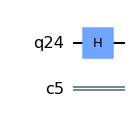

In [35]:
quantum_register = QuantumRegister(1)
classical_register = ClassicalRegister(1)
circuit = QuantumCircuit(quantum_register, classical_register)
circuit.h(quantum_register)

backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
out_state = result.get_statevector()
#piirretään tilavektori
print(out_state)

circuit.draw(output='mpl')

Tul0s kertoo, että kubitin tilavektorin kantavektorien $\ket 0$ ja $\ket 1$ kertoimet 0.707 ovat luvun $\frac{1}{\sqrt{2}}$ likiarvoja. Jos kahden vektorin $\ket 0$ ja $\ket 1$ superpositiotila mitataan, niin kubitin lopputilaksi valikoituu 50%:n todennäköisyydellä jompi kumpi klassinen bitti 0 tai 1:

$$
P(0)=P(1)=(\frac{1}{\sqrt{2}})^2=\frac{1}{2}
$$

Mittausten mahdollisten lopputulosten todennäköisyyksien summa on 1: $P(0)+P(1)=1$

Mitataan kubitin tila ja simuloidaan kvanttipiirin toiminta,ja verrataan tuloksia.

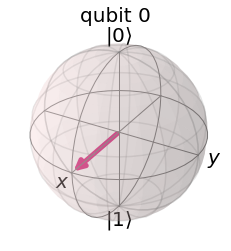

In [37]:
# Huomaa, että On myös mahdollista piirtää tilojen 0 ja 1 yhdistelmä eli superpositiotila
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(out_state)

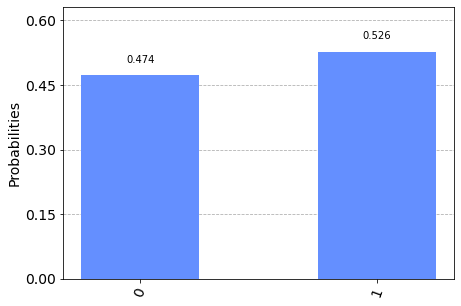

In [36]:
circuit.measure(quantum_register, classical_register)
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))


## Vapaaehtoinen lisätehtävä 6, ei kuulu palautettaviin
a) Luo yhden kubitin kvanttipiiri ja aseta kubitin alkutilaksi $\ket 1$. Mikä on todennäköisyys havaita kubitti tilassa $\ket +$ tai $\ket -$?

b) Jos kubitin alkutilaksi määritetään $\ket +$, niin mikä todennäköisyys havaita mittauksessa tila $\ket -$?



In [ ]:
# koodaa tähän

## Kierroksen 2 oppimateriaaleja

Katso seuraavat videot, joissa havainnollistetaan kvanttilaskennassa käytettyä bra ja ket-vektoriesitystä.



Katso <a href ="https://youtu.be/m77_muSPrs0 " target="_blank">Youtube-video todennäköisyyslaskennan matematiikasta</a>


Katso <a href ="https://youtu.be/Y5WRv_9757A" target="_blank"> kvanttitilojen matemaattiikka ja kahden tilojen superpositio eli yhdistelmätila</a>

